In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures



# Libraries for plotting:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(file_path, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [12]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [13]:
# Functions;

def Dist_Plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of Cars")

    plt.show()
    plt.close()


def PollyPlot(xtrain, xtest, ytrain, ytest, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    # training data
    # testing data
    # lr:  linear regression object
    # poly_transform:  polynomial transformation object

    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, ytrain, 'ro', label='Training Data')
    plt.plot(xtest, ytest, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(
        x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [14]:
y_data = df["price"]

# Drop price data in dataframe x_data:
x_data = df.drop("price", axis=1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.45, random_state=0)

print("Number of Test sample:", x_test.shape[0])
print("Number of Training samples:", x_train.shape[0])

Number of Test sample: 91
Number of Training samples: 110


In [16]:
# Now, let's create a Linear Regression model "poly" and train it.

pr = PolynomialFeatures(degree=5)

In [17]:
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [19]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [20]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.71508499,  7308.03837696, 12213.79222245, 18893.17259916,
       19995.86710176])

In [21]:
# Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.71508499  7308.03837696 12213.79222245 18893.17259916]
True values: [ 6295. 10698. 13860. 13499.]


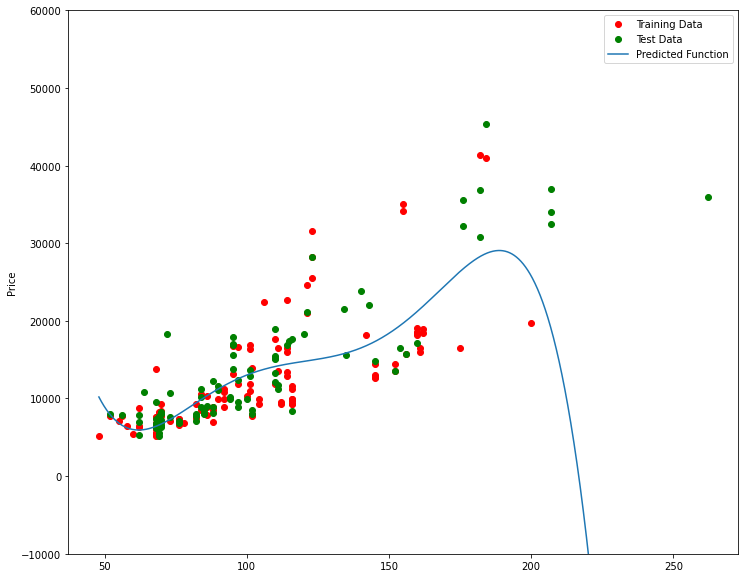

In [22]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)